# Housing Prices Assignment

## Data understanding, preparation and EDA

### Data exploration and cleaning 

In [1]:
# Import all required libraries and read the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Ignore warnings
warnings.filterwarnings('ignore')

# Set decimal display format to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read dataset
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.shape

(1460, 81)

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Checking for columns that have more than 1 unique value
# Shape says 81 which is equal to total number of columns so no columns with redundant data

df_unique = df.nunique(axis=0)
df_unique = df_unique[df_unique[:]>1]
df_unique.shape

(81,)

### Fix null, duplicate and missing values

In [6]:
# Drop duplicates if any 
df.drop_duplicates(inplace=True)

In [8]:
# Checking for null values
# No entirely null rows or columns but null values are present in the dataset

print(df.isnull().values.any())
print(df.isnull().all(axis=0).sum())
print(df.isnull().all(axis=1).sum())

True
0
0


In [9]:
null_counts = df.isnull().sum()
null_counts[null_counts>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [10]:
# Drop the columns with more than 1000 null values
# Drop ID column since it is not useful
df = df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)
df.shape

(1460, 76)

In [12]:
null_counts = df.isnull().sum()
null_counts[null_counts>0].sort_values(ascending=False)

MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64

In [13]:
# Fill null values with None
# Simply means those houses don't have masonry veneer type infrastructure
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [14]:
# No fireplace means no fireplace quality
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [15]:
# we can assume houses have similar area on street
# some fill the nulls with median here
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [16]:
# Fill null values with None
# No garage means no garage condition, type, finish, quality or age
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [17]:
# Fill null values with None
# No basement means no basement exposure, condition, quality or finish type
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [18]:
# fill electrical system with maximum occuring type since it would be the default
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [19]:
# Only GarageYrBlt left, we'll drop it after deriving a better variable from it
null_counts = df.isnull().sum()
null_counts[null_counts>0].sort_values(ascending=False)

GarageYrBlt    81
dtype: int64

### Derived Variables

In [20]:
# Calculate age of different parts of house and overall age
df['HouseAge']=df['YrSold']-df['YearBuilt']
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

# Doing this since GarageYrBlt had some nulls
df['GarageAge'] = df['GarageAge'].fillna(0)

In [21]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,RemodelAge
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,5,5.000,5
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,31,31.000,31
2,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,7,7.000,6
3,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,91,8.000,36
4,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,8,8.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.000,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,8,8.000,7
1456,20,RL,85.000,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,32,32.000,22
1457,70,RL,66.000,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,69,69.000,4
1458,20,RL,68.000,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,60,60.000,14


In [22]:
# we can further aggregate the square feet area of house and number of bathrooms
df['TotalSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

In [23]:
df.shape

(1460, 80)

### Check for and remove variables that don't have much unique values

In [24]:
# Check if there are columns that have only two unique values
df_unique = df.nunique(axis=0)
df_unique_2 = df_unique[df_unique[:] == 2]
print(df_unique_2.shape)
print(df.shape)
print(df_unique_2)

(3,)
(1460, 80)
Street        2
Utilities     2
CentralAir    2
dtype: int64


In [26]:
# Check if there are columns that have only three unique values
df_unique = df.nunique(axis=0)
df_unique_3 = df_unique[df_unique[:] == 3]
print(df_unique_3.shape)
print(df.shape)
print(df_unique_3)

(4,)
(1460, 80)
LandSlope       3
BsmtHalfBath    3
HalfBath        3
PavedDrive      3
dtype: int64


In [27]:
df_filtered_2 = df[df_unique_2.index]
df_filtered_2

,Street,Utilities,CentralAir
0,Pave,AllPub,Y
1,Pave,AllPub,Y
2,Pave,AllPub,Y
3,Pave,AllPub,Y
4,Pave,AllPub,Y
...,...,...,...
1455,Pave,AllPub,Y
1456,Pave,AllPub,Y
1457,Pave,AllPub,Y
1458,Pave,AllPub,Y


In [28]:
df_filtered_3 = df[df_unique_3.index]
df_filtered_3

,LandSlope,BsmtHalfBath,HalfBath,PavedDrive
0,Gtl,0,1,Y
1,Gtl,1,0,Y
2,Gtl,0,1,Y
3,Gtl,0,0,Y
4,Gtl,0,1,Y
...,...,...,...,...
1455,Gtl,0,1,Y
1456,Gtl,0,0,Y
1457,Gtl,0,0,Y
1458,Gtl,0,0,Y


In [29]:
# print value counts of columns with only two unique values to check if there is a skew
for i in df_filtered_2.columns :
    print(df_filtered_2[i].value_counts(), "\n")

Street
Pave    1454
Grvl       6
Name: count, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

CentralAir
Y    1365
N      95
Name: count, dtype: int64 



In [30]:
# print value counts of columns with only three unique values to check if there is a skew
for i in df_filtered_3.columns :
    print(df_filtered_3[i].value_counts(), "\n")

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64 

BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64 

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64 

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64 



In [34]:
# There is a skew with many columns having a single value with maximum counts
# We can identify and drop columns which have more than 90% values as same type
skew_number = 1460*0.90
column_to_drop = [] 

for i in df.columns :
    if df[i].value_counts().max() >= skew_number:
        column_to_drop.append(i)

print(column_to_drop)

df.drop(column_to_drop,axis=1,inplace=True)

[]


In [32]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'HouseAge',
       'GarageAge', 'RemodelAge', 'TotalSF', 'TotalBath'],
      dtype='object')

## Exploratory Data Analysis

In [33]:
# Based on data_description.txt define categorical and numerical columns
column_categorical = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']
column_numerical = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'HouseAge', 'GarageAge', 'RemodelAge', 'TotalSF', 'TotalBath']
print(len(column_categorical))
print(len(column_numerical))

28
33


### Categorical Variables

In [35]:
# Analysis of Categorical variables
# All the unique values they hold and top occuring values

for idx,i in enumerate(column_categorical):
    print(df[i].describe(), "\n")
    print(df[i].unique(), "\n")

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object 

['RL' 'RM' 'C (all)' 'FV' 'RH'] 

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object 

['Reg' 'IR1' 'IR2' 'IR3'] 

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object 

['Lvl' 'Bnk' 'Low' 'HLS'] 

count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object 

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object 

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object 

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn

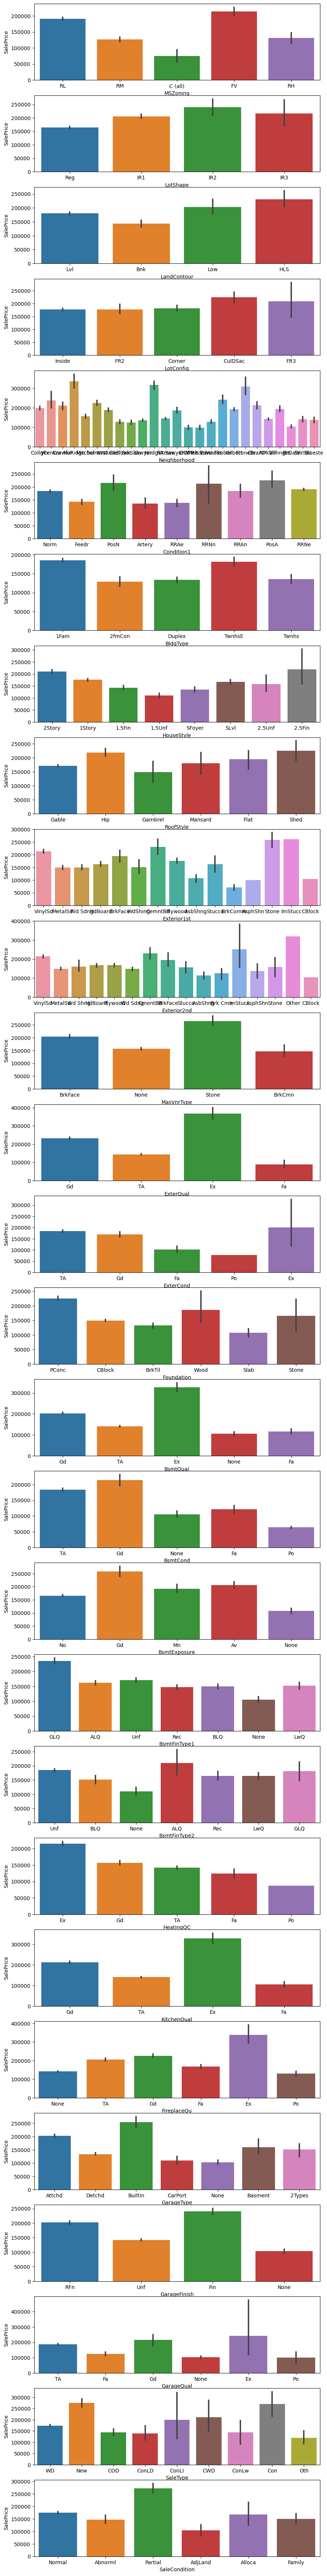

In [36]:
# Analysis of Categorical Variables
# Graphical distribution with respect to SalePrice

# In MSZoning, floating village residential or low residensial density seem to have highest sale price
# No clear pattern in lot shape, with moderately irregular and irregular having highest sale price

# Hill side property has highest price, banked one has lowest
# Concrete foundation has highest prices followed by wood and stone
# Single-family and townhouse end unit seem to have higher sale prices in general

# Houses with excellent exterior condition and specially Imitation Stucco, Vinyl or Stone exterior covering 
# have highest prices

# Houses with shed and hip roof style seem to have higher prices, although not much difference in prices
# based on roof style in general

# Stone type of masonry veneer has highest sale price
# More the number of storeys (and finished storeys), higher the sale price

# Higher the quality of basement, higher the sale price
# Basements with average and good living quarters have the highest prices

# Excellent and good qualtiy garage houses have higher sale price than the poor quality ones
# Furnished garage houses as well as built-in garage houses have higher sale prices
# Similarly, higher the quality of kitchen, fireplace and heating, higher the sale price of house

# Newly constructed sale type or the ones with 15% down payment have highest price
# New partially constructed homes have highest price while adjoining land purchase has lowest price

plt.figure(figsize = (10,90))
for idx,i in enumerate(column_categorical):
    plt.subplot(28,1,idx+1)
    ax = sns.barplot(x=i, y="SalePrice", data=df)
    ax.set_xlabel(i)
    ax.set_ylabel('SalePrice')
plt.show()

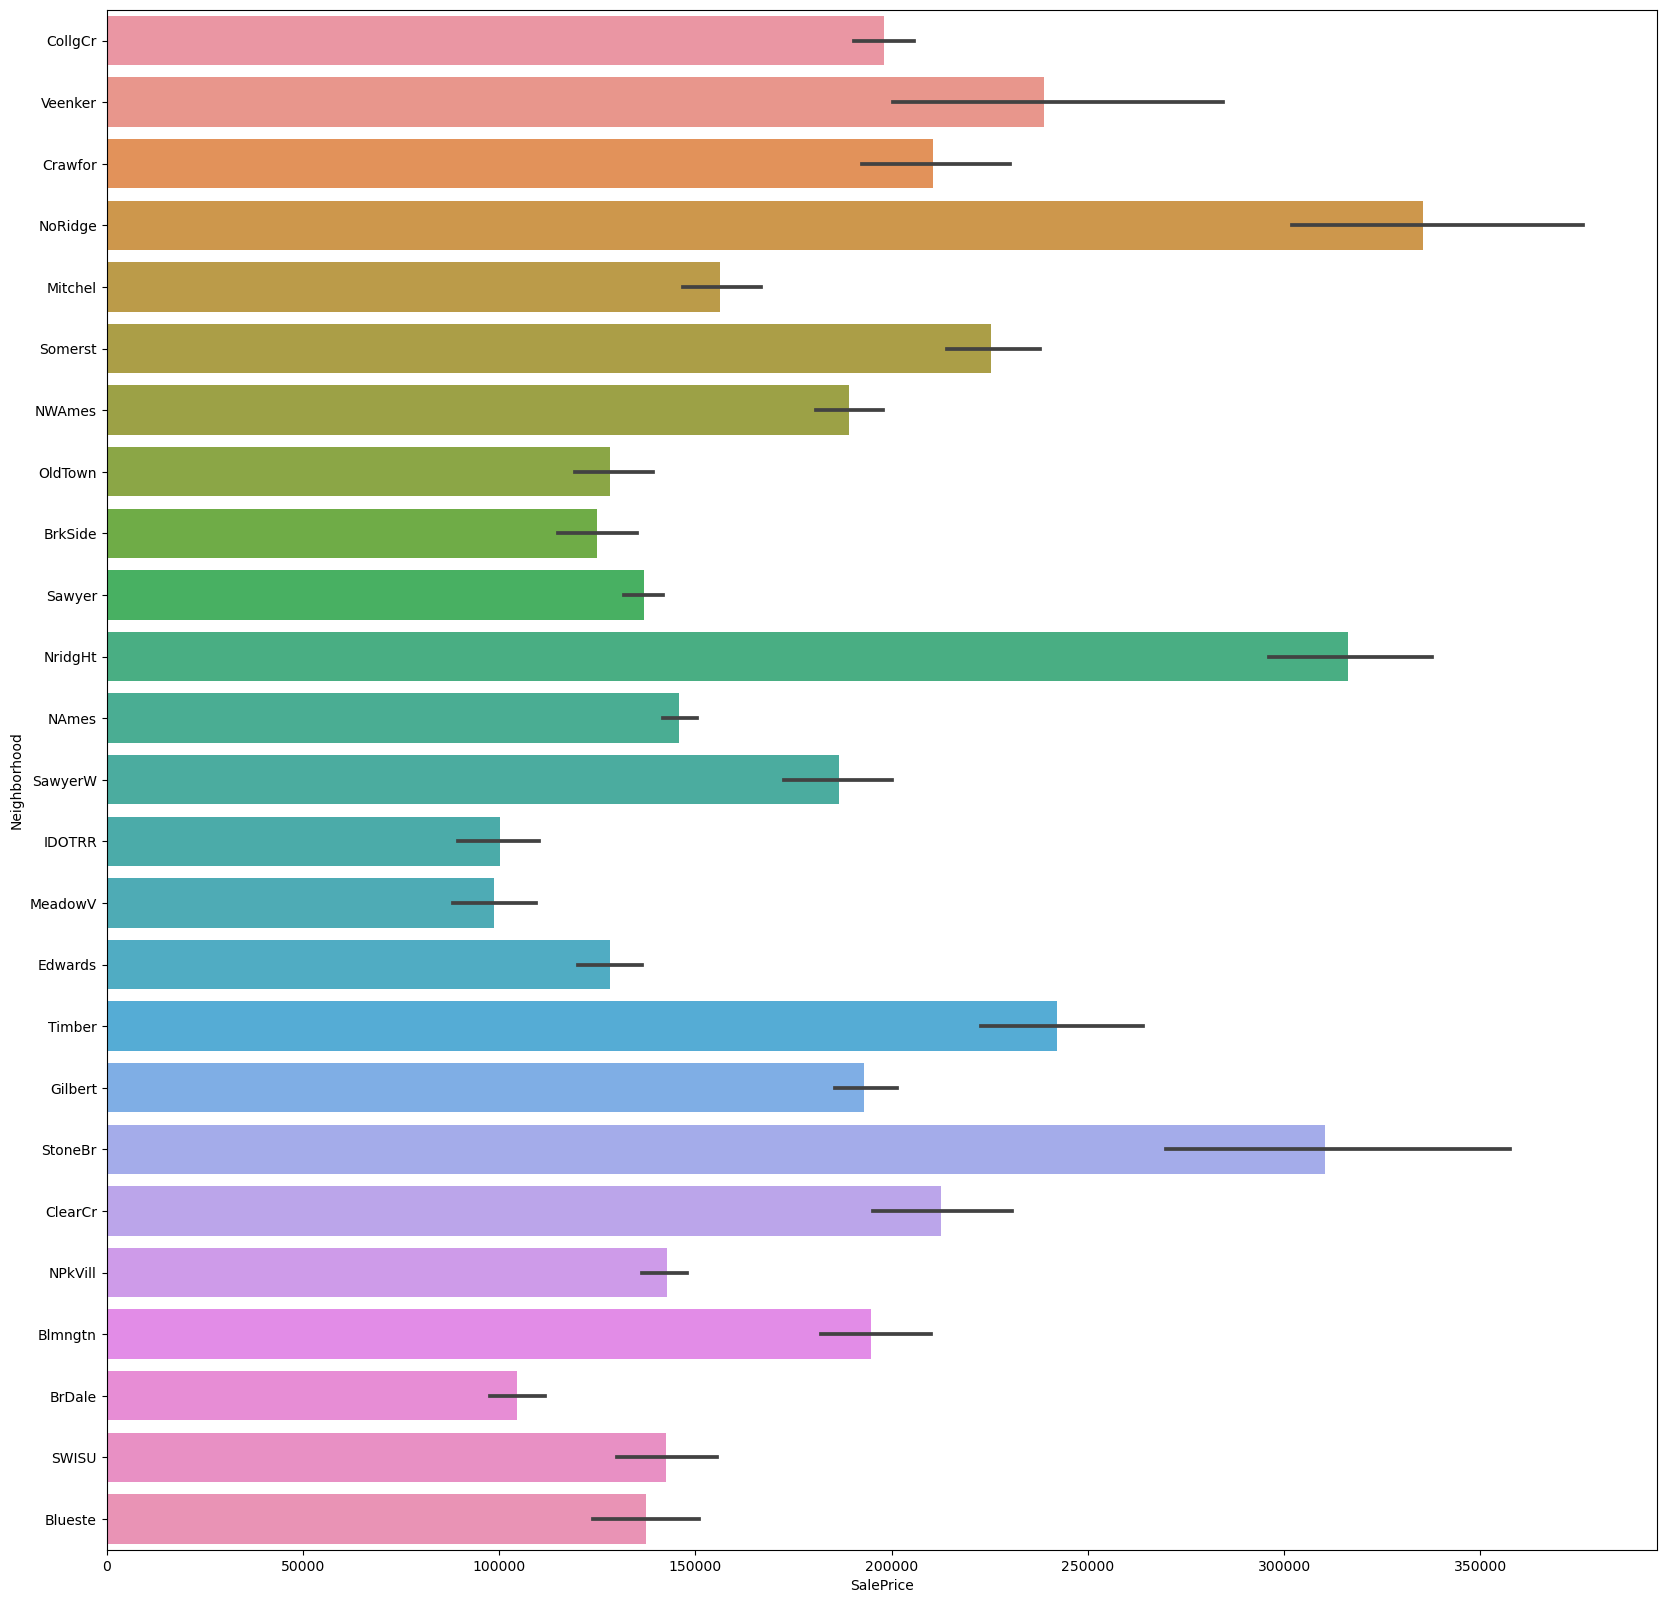

In [37]:
# Houses with NorthRidge, NorthRidge Heights and Stone Brook in vicinity have highest prices
# Houses with Iowa, Meadow Village and Briardale in vicinity have highest prices
plt.figure(figsize = (20,20))
ax = sns.barplot(y="Neighborhood", x="SalePrice", data=df)
ax.set_ylabel('Neighborhood')
ax.set_xlabel('SalePrice')
plt.show()

### Numerical Variables

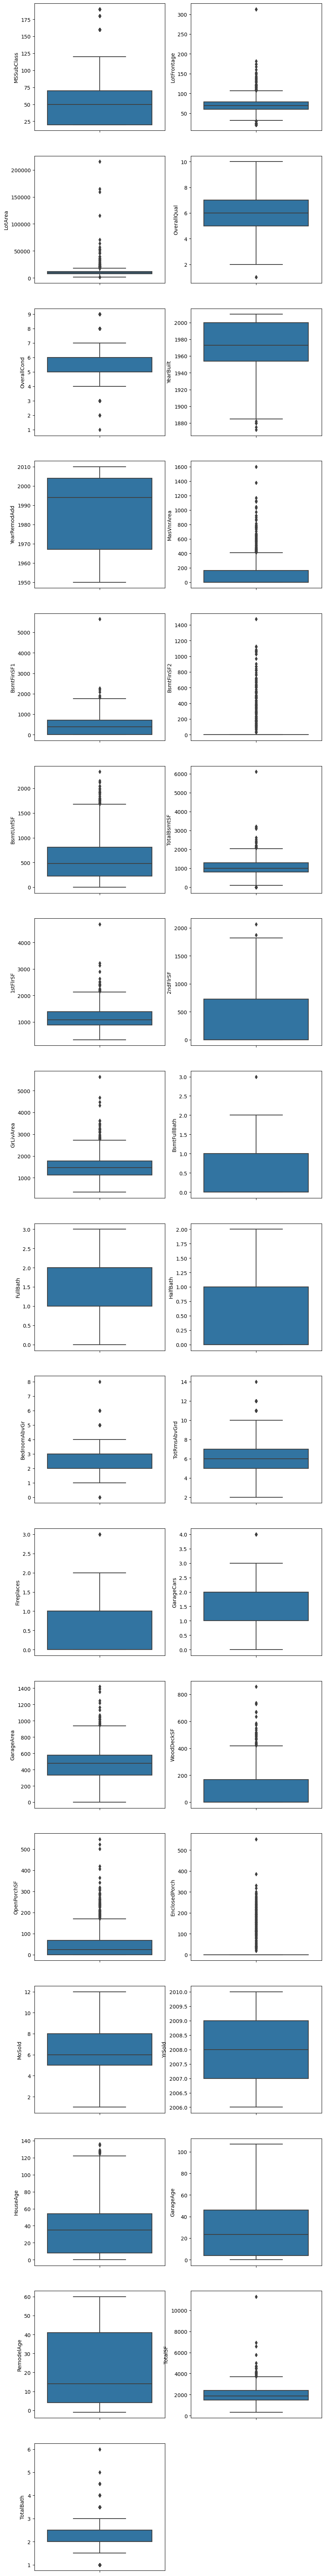

In [38]:
# Analysis of Numerical Variables
# General proportions and amount
# Skew and outliers

plt.figure(figsize = (10,90))
for idx,i in enumerate(column_numerical):
    plt.subplot(17,2,idx+1)
    sns.boxplot(y=i, data=df)
plt.show()

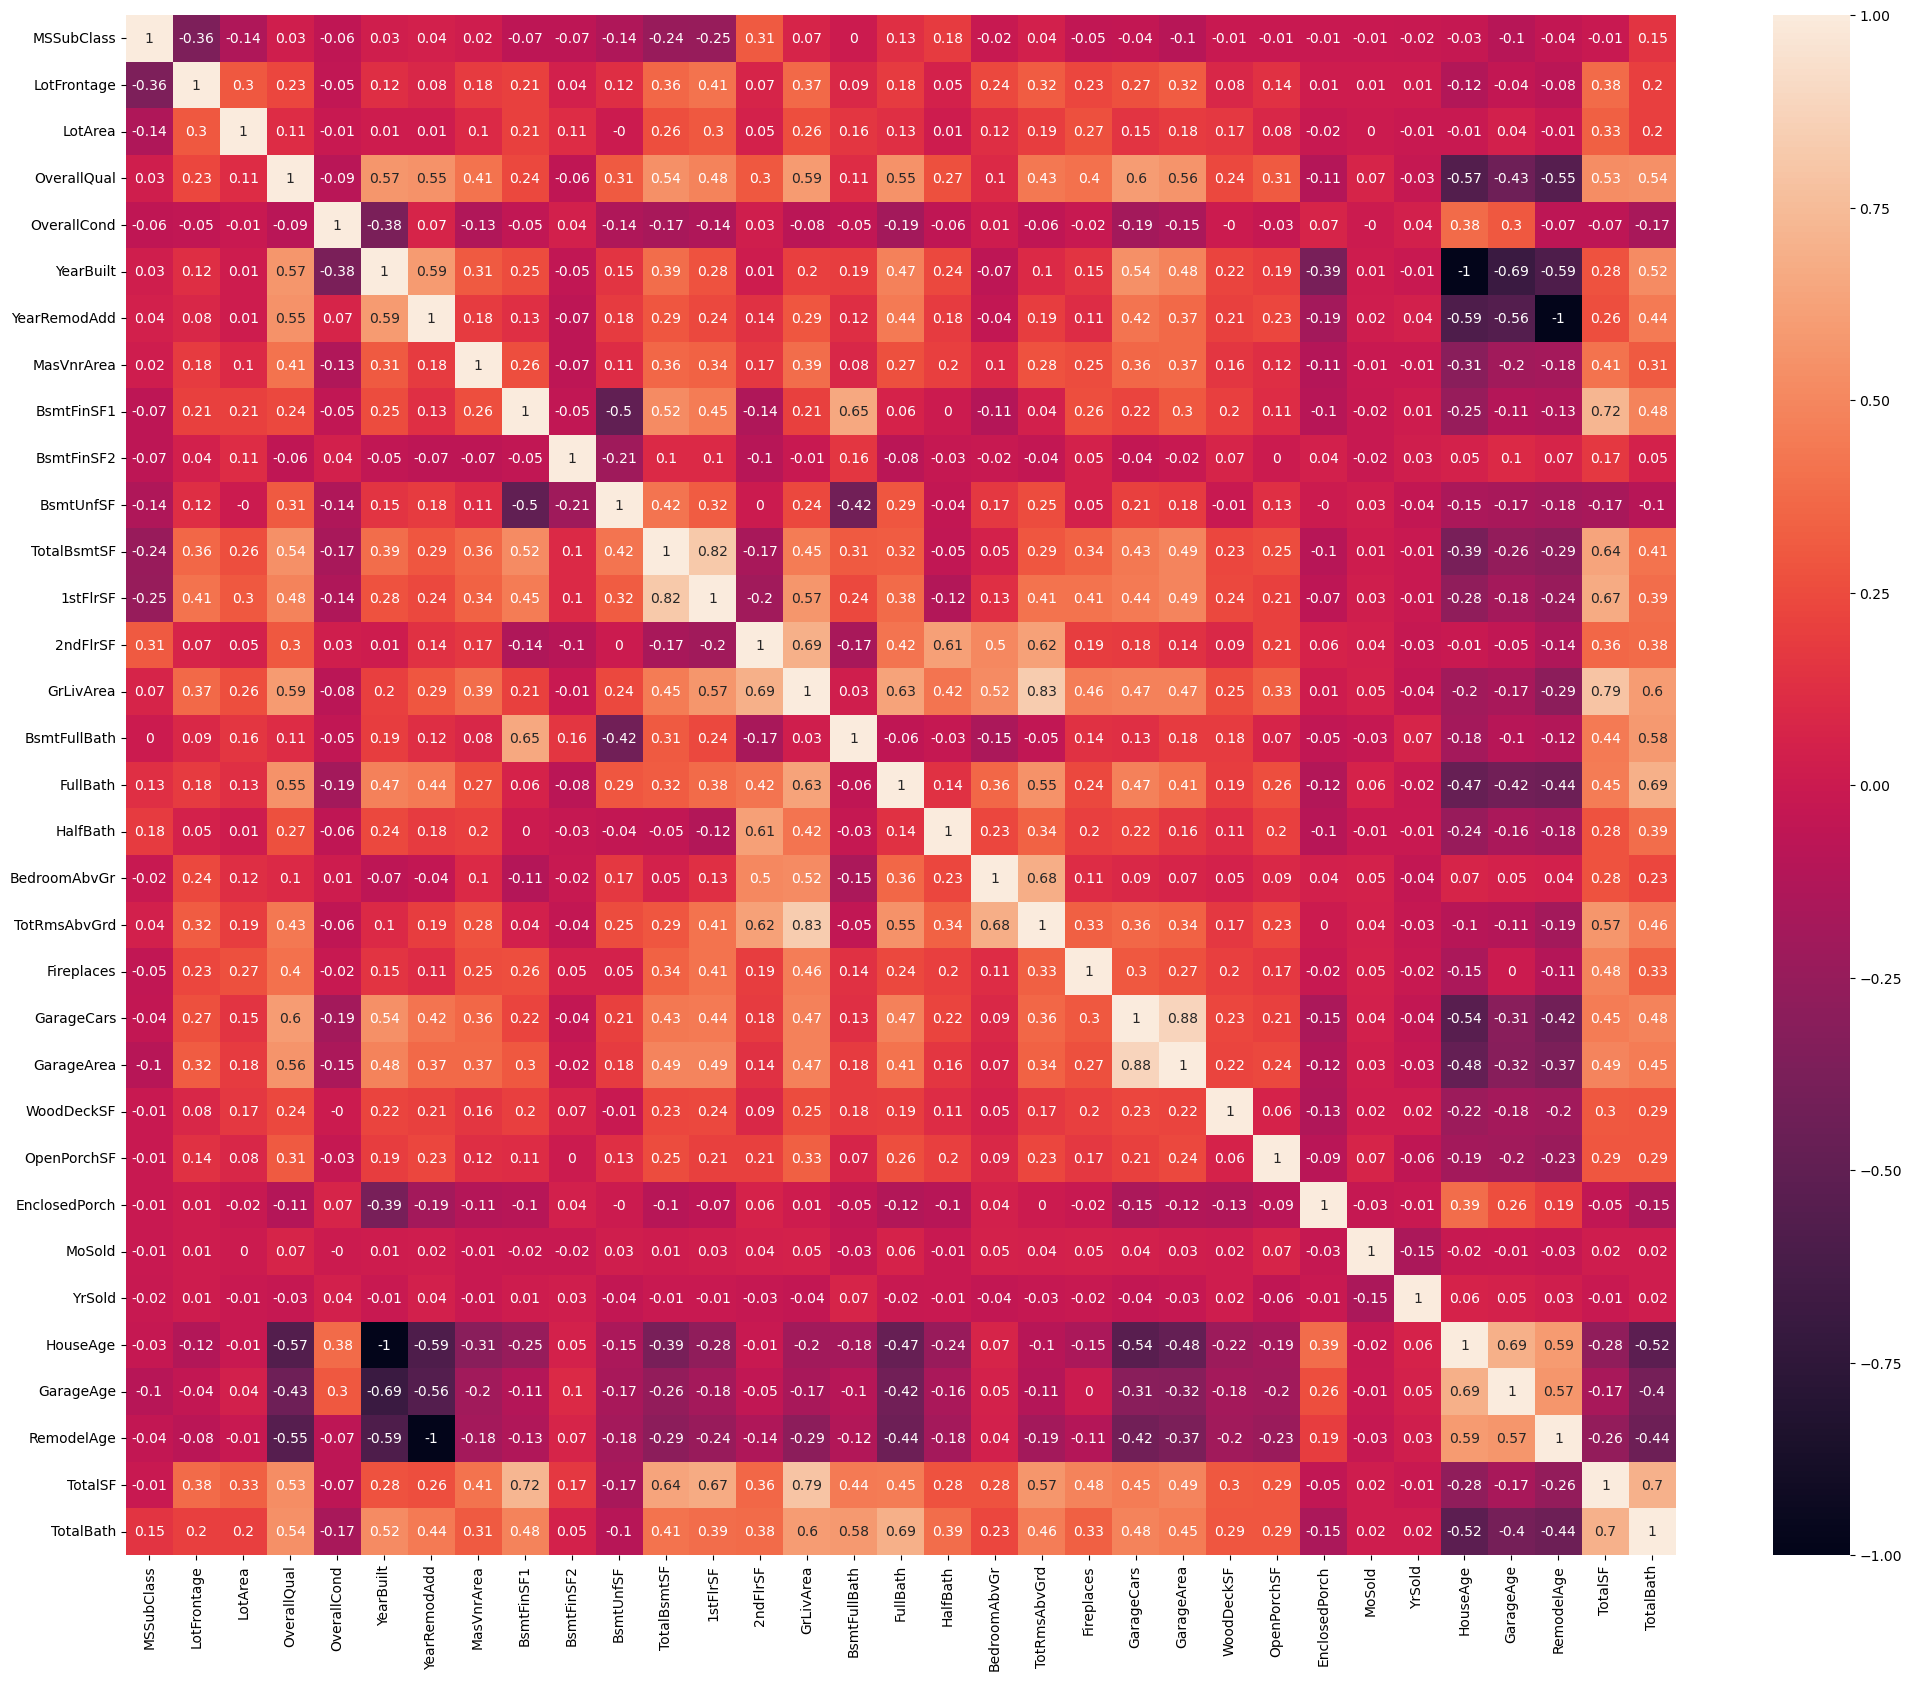

In [39]:
# Numeric variables correlation matrix
plt.subplots(figsize = (25,20))
sns.heatmap(round(df[column_numerical].corr(), 2), annot = True)
plt.show()

### Outlier Detection and Treament

In [40]:
# Based on analysis of numerical variables, we have identified variables with clear outliers
# We'll go ahead and remove data above 99 percentile for those
outlier = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'TotalSF']

for i in outlier:
    qnt = df[i].quantile(0.99)
    df = df[df[i] < qnt]

In [41]:
# Number of rows reduced from 1460 to 1275 after outlier removal
df.shape

(1275, 62)

## Prepare dataset for model building and split into train and test

In [42]:
# Divide categorical variables as dummy variables
df=pd.get_dummies(data=df, columns=column_categorical, drop_first=True, dtype=int)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,7,5,2003,2003,196.000,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.000,9600,6,8,1976,1976,0.000,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.000,11250,7,5,2001,2002,162.000,486,0,...,0,0,0,0,1,0,0,0,1,0
4,60,84.000,14260,8,5,2000,2000,350.000,655,0,...,0,0,0,0,1,0,0,0,1,0
5,50,85.000,14115,5,5,1993,1995,0.000,732,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
# n-1 columns added for n possible categorical values in a variable
print(df.shape)
print(df.columns)

(1275, 202)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=202)


In [44]:
# Splitting data; training data is 70%; testing data is 30%
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [45]:
df_train.shape

(892, 202)

In [46]:
df_test.shape

(383, 202)

### Scale the dataset

In [47]:
# Rescale variables so that all numeric variables have a comparable scale of values
scaler = MinMaxScaler()

df_train[column_numerical] = scaler.fit_transform(df_train[column_numerical])
df_test[column_numerical] = scaler.transform(df_test[column_numerical])

In [48]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
80,0.235,0.699,0.347,0.556,0.625,0.672,0.300,0.750,0.303,0.000,...,0,0,0,0,1,0,0,0,1,0
761,0.059,0.345,0.164,0.444,0.500,0.328,0.000,0.000,0.274,0.000,...,0,0,0,0,1,0,0,0,1,0
578,0.824,0.115,0.064,0.667,0.500,0.977,0.950,0.000,0.000,0.000,...,0,0,0,0,1,0,0,0,0,0
48,1.000,0.106,0.090,0.333,0.500,0.297,0.967,0.000,0.000,0.000,...,0,0,1,0,0,0,0,0,0,1
1103,0.000,0.513,0.224,0.556,0.625,0.602,0.150,0.000,0.443,0.000,...,0,0,0,0,1,0,0,0,1,0


In [49]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
110,0.176,0.478,0.243,0.556,0.375,0.562,0.367,0.000,0.300,0.000,...,0,0,0,0,1,0,0,0,1,0
577,0.353,0.664,0.310,0.444,0.625,0.656,0.267,0.126,0.222,0.697,...,0,0,0,0,1,0,0,0,0,0
1174,0.294,0.522,0.455,0.556,0.875,0.391,0.000,0.000,0.340,0.000,...,0,0,0,0,1,0,0,0,1,0
150,0.000,0.876,0.268,0.444,0.625,0.727,0.417,0.000,0.484,0.000,...,0,0,0,0,1,0,0,0,1,0
1242,0.382,0.566,0.276,0.667,0.625,0.719,0.400,0.105,0.598,0.212,...,0,0,0,0,1,0,0,1,0,0


In [50]:
# Since we need to predict the sales price of houses; SalePrice is separated as dependent variable
# Remaining all columns are separated as independent variables

y_train = df_train.pop('SalePrice')
X_train = df_train

In [51]:
X_train.shape

(892, 201)

## Build model using RFE and LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 101 (out of 201)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=100)
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('FullBath', True, 1),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('TotRmsAbvGrd', False, 3),
 ('Fireplaces', False, 3),
 ('GarageCars', False, 3),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('MoSold', False, 3),
 ('YrSold', True, 1),
 ('HouseAge', True, 1),
 ('GarageAge', False, 3),
 ('RemodelAge', True, 1),
 ('TotalSF', True, 1),
 ('TotalBath', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 3),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('

In [54]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageArea', 'YrSold',
       'HouseAge', 'RemodelAge', 'TotalSF', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_PosA', 'Condition1_RRAe',
       'Condition1_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock

In [55]:
# Since 100 columns have rank 1 and the rest rank 2; it picks up 100 columns even if defined step was 101
col.shape

(100,)

In [56]:
# Left out columns
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=101)

In [57]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable   
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        21:52:03   Log-Likelihood:                -9965.9
No. Observations:                 892   AIC:                         2.010e+04
Df Residuals:                     806   BIC:                         2.052e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.369e+

In [58]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [59]:
# VIF below 5 threshold
vif[vif['VIF']<=5]

,Features,VIF
2,OverallQual,4.110
54,Exterior1st_Plywood,4.040
0,MSSubClass,3.800
42,BldgType_TwnhsE,3.660
69,ExterQual_TA,3.540
55,Exterior1st_Stucco,3.370
65,Exterior2nd_Stucco,3.330
14,GarageArea,2.950
13,FullBath,2.910
82,KitchenQual_Fa,2.660


In [60]:
# VIF above 5 threshold
vif[vif['VIF']>5]

,Features,VIF
80,BsmtFinType2_None,inf
10,1stFlrSF,inf
93,GarageType_None,inf
18,TotalSF,inf
17,RemodelAge,inf
16,HouseAge,inf
15,YrSold,inf
74,BsmtQual_None,inf
95,GarageQual_None,inf
11,2ndFlrSF,inf


## Model Prediction and Evaluation

### Preparing test data

In [61]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [62]:
X_test_rfe = X_test[col]
X_test_rfe_sm = sm.add_constant(X_test_rfe)

In [63]:
X_train_rfe.shape

(892, 100)

### Making predictions and comparing scores of test and train data

In [64]:

y_pred_train = lm.predict(X_train_rfe_sm)
y_pred_test = lm.predict(X_test_rfe_sm)

print("Train results:")

metric = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

print("\nTest results:")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

Train results:
0.9191254846509997
264363215539.29633
296371317.86916625

Test results:
0.874957466714972
171398633264.50168
447516013.7454352


In [65]:
# Since there is a good difference between the scores of train data and test data, we might be at the risk of
# overfitting
# So we'll perform regularization to see if there is an improvement in the scores

## Regularization - Ridge Regression

In [66]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [68]:
#Fitting Ridge model
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-16398.5412846   13535.71404255  15230.99013211  40023.24065672
  25875.24462312  16229.21793078   3546.1693099    8580.75209444
  16324.24650714  -3257.27202181  10798.3631406   21388.82947551
  22205.45881017  22817.33776193  29278.29477957   3441.28544743
  10063.99584012   4157.34736312  -3822.47458435   7170.00092532
   5001.96378882   5275.47072636  13464.79187596   7477.20574796
   6937.98464379    964.57217185   1899.54021977   1309.74641463
 -16315.75519277  -4248.64425239  -3458.85288226  31426.98533371
   6948.16763197   7057.09871599   -845.86333635   7432.28549145
   5056.62877822   3207.42332113   -169.62209208    623.18807308
   2880.75628594  -4678.35170048  -2117.02398567   5410.82172673
  -6075.27792276  -6402.52056488  -1375.61566079      0.
   3418.2295648     727.07186149  -2185.19129672  -7922.54533952
  18561.28005622 -11995.78969907 -10406.74804641  -6294.96608162
  -6901.07547187 -13028.31094115  -8816.28920087   9160.09086099
  -6726.17658508  16477.27969612 

In [69]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []

print("Train results:")

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

print("\nTest results:")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train results:
0.9298796689075287
229209858288.38065
256961724.5385433

Test results:
0.894740930363011
144280991439.5193
376712771.38255686


In [70]:
ridge_coef_df = pd.DataFrame(ridge.coef_ , columns = ['Coefficient'], index =  X_train.columns)
ridge_coef_df = ridge_coef_df.sort_values(by = 'Coefficient', ascending = False)
ridge_coef_df.head(10)

,Coefficient
OverallQual,40023.241
TotalSF,31426.985
GrLivArea,29278.295
Neighborhood_StoneBr,26430.082
OverallCond,25875.245
2ndFlrSF,22817.338
1stFlrSF,22205.459
TotalBsmtSF,21388.829
Neighborhood_NridgHt,20449.694
Neighborhood_Crawfor,18561.280


In [71]:
# Ridge regression seems to have improved R2 scores and reduced errors as compared to the original linear
# regression model

## Regularization - Lasso Regression

In [72]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
print(model_cv.best_params_)

{'alpha': 50}


In [74]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [75]:
lasso.coef_

array([-1.44257574e+04,  1.07305241e+04,  1.70576945e+04,  6.54167210e+04,
        3.43245865e+04,  3.73549146e+04,  4.81258840e+03,  6.06792898e+03,
        0.00000000e+00, -7.31637422e+03,  0.00000000e+00,  2.93054332e+04,
        0.00000000e+00,  5.35392990e+03,  6.06120890e+04,  0.00000000e+00,
        2.58738662e+03,  0.00000000e+00, -1.58715378e+03,  0.00000000e+00,
        0.00000000e+00,  6.15687089e+02,  1.26507603e+04,  7.27464583e+03,
        6.57777275e+03,  0.00000000e+00,  1.61141061e+02,  3.09055761e+02,
       -6.02889932e+03, -3.63539378e+03, -0.00000000e+00,  5.03686095e+04,
        1.00634953e+04,  1.62282659e+02, -0.00000000e+00,  1.91914303e+03,
        0.00000000e+00,  2.09075694e+02, -0.00000000e+00,  1.85115316e+02,
        1.01580422e+02, -0.00000000e+00, -1.27253970e+03,  4.44340278e+03,
       -4.36559417e+03, -3.53656794e+00, -5.44310012e+02,  0.00000000e+00,
        3.21205082e+03,  4.19365752e+03,  0.00000000e+00, -2.22985621e+03,
        2.41548862e+04, -

In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []

print("Train results:")

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

print("\nTest results:")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train results:
0.9283793769633154
234114023721.81015
262459667.84956294

Test results:
0.8977117349523894
140208842284.04187
366080528.1567673


In [77]:
lasso_coef_df = pd.DataFrame(lasso.coef_ , columns = ['Coefficient'], index =  X_train.columns)
lasso_coef_df = lasso_coef_df.sort_values(by = 'Coefficient', ascending = False)
lasso_coef_df.head(10)

,Coefficient
OverallQual,65416.721
GrLivArea,60612.089
TotalSF,50368.609
YearBuilt,37354.915
Neighborhood_StoneBr,34992.042
OverallCond,34324.586
TotalBsmtSF,29305.433
Neighborhood_NridgHt,25156.865
Neighborhood_Crawfor,24154.886
SaleCondition_Partial,23959.137


In [78]:
# Lasso regression seems to have improved R2 scores and reduced errors as well when compared to the original linear
# regression model. Its error are also slightly lower when compared to ridge regression

## Comparison of models

In [79]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','RSS (Train)','MSE (Train)',
                       'R2 Score (Test)','RSS (Test)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.919,0.930,0.928
1,RSS (Train),264363215539.296,229209858288.381,234114023721.810
2,MSE (Train),17215.438,16030.026,16200.607
3,R2 Score (Test),0.875,0.895,0.898
4,RSS (Test),171398633264.502,144280991439.519,140208842284.042
5,MSE (Test),21154.574,19409.090,19133.231


## What will be the changes in model when the alpha is doubled for both?

### Ridge Regression

In [80]:
alpha = 8
ridge_2 = Ridge(alpha=alpha)

ridge_2.fit(X_train, y_train)

Ridge(alpha=8)

In [81]:
y_pred_train = ridge_2.predict(X_train)
y_pred_test = ridge_2.predict(X_test)

print("Train results:")

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

print("\nTest results:")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

Train results:
0.9233650522985375
250504885372.33502
280835073.2873711

Test results:
0.8923057456401652
147618954309.24887
385428079.13642


In [82]:
ridge_2_coef_df = pd.DataFrame(ridge_2.coef_ , columns = ['Coefficient'], index =  X_train.columns)
ridge_2_coef_df = ridge_2_coef_df.sort_values(by = 'Coefficient', ascending = False)
ridge_2_coef_df.head(10)

,Coefficient
OverallQual,32501.759
TotalSF,28763.425
GrLivArea,26301.658
1stFlrSF,21478.457
Neighborhood_StoneBr,21289.010
TotalBsmtSF,20574.557
OverallCond,20216.363
Neighborhood_NridgHt,18823.777
2ndFlrSF,17832.937
Neighborhood_Crawfor,17083.942


In [90]:
# When doubling alpha for Ridge regression, the R2 score for both train and test data decreases 
# and the RSS and MSE increases

### Lasso Regression

In [83]:
alpha = 100

lasso_2 = Lasso(alpha=alpha)
        
lasso_2.fit(X_train, y_train) 

Lasso(alpha=100)

In [84]:
y_pred_train = lasso_2.predict(X_train)
y_pred_test = lasso_2.predict(X_test)

print("Train results:")

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

print("\nTest results:")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

Train results:
0.9215155302783421
256550616668.02945
287612798.95518994

Test results:
0.8977674320027893
140132497075.2188
365881193.40788203


In [85]:
lasso_2_coef_df = pd.DataFrame(lasso_2.coef_ , columns = ['Coefficient'], index =  X_train.columns)
lasso_2_coef_df = lasso_2_coef_df.sort_values(by = 'Coefficient', ascending = False)
lasso_2_coef_df.head(10)

,Coefficient
OverallQual,69546.748
GrLivArea,64902.954
TotalSF,52670.473
OverallCond,31702.666
Neighborhood_StoneBr,30135.296
TotalBsmtSF,25852.641
YearBuilt,25592.919
SaleCondition_Partial,24751.865
Neighborhood_NridgHt,24555.806
Neighborhood_Crawfor,22815.429


In [91]:
# When doubling alpha for Lasso regression, the R2 score decreases for train data but almost similar for test data.
# The RSS and MSE increases for train data but almost similar for test data

## Drop top 5 lasso predictor variables and rebuild the model

In [86]:
#dropping the top 5 most important predictor variables in the lasso model 
column_predictor = ['OverallQual','GrLivArea','TotalSF','YearBuilt','Neighborhood_StoneBr']
X_train.drop(labels = column_predictor, axis = 1, inplace=True)
X_test.drop(labels = column_predictor, axis = 1, inplace=True)

In [87]:
alpha = 50

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train, y_train) 

Lasso(alpha=50)

In [88]:
y_pred_train = lasso_new.predict(X_train)
y_pred_test = lasso_new.predict(X_test)

print("Train results:")

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

print("\nTest results:")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

Train results:
0.9212928363294215
257278560299.76263
288428879.25982356

Test results:
0.8781234568720658
167058938829.34634
436185218.8755779


In [89]:
lasso_new_coef_df = pd.DataFrame(lasso_new.coef_ , columns = ['Coefficient'], index =  X_train.columns)
lasso_new_coef_df = lasso_new_coef_df.sort_values(by = 'Coefficient', ascending = False)
lasso_new_coef_df.head(10)

,Coefficient
2ndFlrSF,78937.091
1stFlrSF,74830.183
OverallCond,43250.091
TotalBsmtSF,41169.892
BsmtFinSF1,25481.458
SaleCondition_Partial,23533.098
Neighborhood_Crawfor,17463.449
Neighborhood_NridgHt,16806.280
Neighborhood_NoRidge,15596.865
GarageArea,14592.062
